In [1]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import requests

import random
import tensorflow as tf

import numpy as np
from paddleocr import PaddleOCR

# Dataset

In [2]:
DATASET_FOLDER = '../dataset'
train = pd.read_csv(os.path.join(DATASET_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATASET_FOLDER, 'test.csv'))
sample_test = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test.csv'))
sample_test_out = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test_out.csv'))

In [3]:
train

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram
...,...,...,...,...
263854,https://m.media-amazon.com/images/I/612J1R1xHl...,558806,height,5.0 centimetre
263855,https://m.media-amazon.com/images/I/61Blzh2+28...,470067,height,8.5 inch
263856,https://m.media-amazon.com/images/I/51MsegDL9V...,204245,height,43.2 centimetre
263857,https://m.media-amazon.com/images/I/510KhVw4VS...,752266,height,9.1 centimetre


## Seperate unique classes

In [4]:
len(train['group_id'].unique())

750

In [5]:
unique_df = train.drop_duplicates(subset=['group_id'])
unique_df

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram
10,https://m.media-amazon.com/images/I/81N73b5khV...,149159,item_weight,30.0 kilogram
...,...,...,...,...
193004,https://m.media-amazon.com/images/I/61EA91rTGw...,819766,depth,20.0 centimetre
205213,https://m.media-amazon.com/images/I/51wPH3Euhc...,226428,depth,25.0 inch
215716,https://m.media-amazon.com/images/I/617PcjKZSi...,841314,depth,6.0 inch
224716,https://m.media-amazon.com/images/I/611GMw1iTs...,497735,height,25.0 centimetre


## Randomly sample 500 images

In [6]:
random_sample = unique_df.sample(n=5, random_state=42)

In [7]:
random_sample = random_sample.reset_index(drop=True)

In [8]:
random_sample['entity_name'] = random_sample['entity_name'].astype(str)

In [9]:
random_sample

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61Fg2MSRWg...,735806,width,65.0 millimetre
1,https://m.media-amazon.com/images/I/61Ew4PaUd8...,202651,width,2.0 inch
2,https://m.media-amazon.com/images/I/61ihd4f5up...,245959,item_weight,0.65 kilogram
3,https://m.media-amazon.com/images/I/51XQPejLXk...,242256,width,90.0 centimetre
4,https://m.media-amazon.com/images/I/51+bXgO3Jh...,640565,width,6.8 centimetre


In [10]:
for i in range (5):
    print(random_sample['image_link'][i])

https://m.media-amazon.com/images/I/61Fg2MSRWgL.jpg
https://m.media-amazon.com/images/I/61Ew4PaUd8L.jpg
https://m.media-amazon.com/images/I/61ihd4f5upL.jpg
https://m.media-amazon.com/images/I/51XQPejLXkL.jpg
https://m.media-amazon.com/images/I/51+bXgO3JhL.jpg


## Get a list of images

In [11]:
imgs = []
for i in range(5):
    imgs.append(Image.open(requests.get(random_sample.iloc[i,:]['image_link'], stream=True).raw).convert('RGB'))

In [12]:
imgs

[<PIL.Image.Image image mode=RGB size=1500x1500>,
 <PIL.Image.Image image mode=RGB size=1500x1500>,
 <PIL.Image.Image image mode=RGB size=1600x1600>,
 <PIL.Image.Image image mode=RGB size=1456x940>,
 <PIL.Image.Image image mode=RGB size=1002x1002>]

## Display images randomly

5
                                          image_link  group_id entity_name  \
5  https://m.media-amazon.com/images/I/51tNTgGggv...    123238       width   

      entity_value  
5  40.0 centimetre  


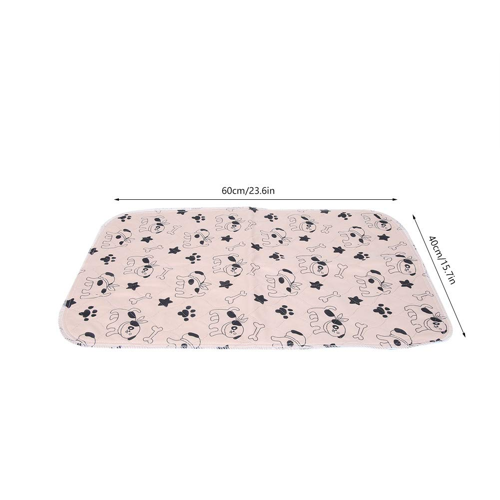

In [15]:
num = random.randrange(0, 9)
imgnum = num

print(num)
print(random_sample.iloc[num:num+1])
imgs[imgnum].resize((int(imgs[imgnum].size[0]/2), int(imgs[imgnum].size[1]/2)))

In [16]:
entity_label=random_sample['entity_name'][imgnum]
entity_label

'width'

# ocr

In [13]:
ocr = PaddleOCR(
    lang = 'en',
    use_angle_cls=True,  # Enable angle classifier
    cls_model_dir='C:\\Users\\ASUS/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer',  # Path to angle classifier model
    use_gpu=True,  # Enable GPU
    det_db_unclip_ratio=1.5,  # Adjust detection parameters
    det_db_thresh=0.15,
    rec_image_shape='3, 48, 480',  # Adjust recognition parameters
    max_text_length=50,
    max_batch_size=20,  # Adjust batch size
    rec_batch_num=8,
    cls_batch_num=8,
    ocr_version='PP-OCRv4',  # Use PP-OCRv4
    layout=True,  # Enable layout analysis
    table=True,  # Enable table recognition
    formula=True,  # Enable formula recognition
    recovery_to_markdown=True  # Enable recovery to Markdown
)


[2025/03/20 18:11:10] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/tanmaykhade/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.15, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=20, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/tanmaykhade/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=8

In [ ]:
results = []
for j in range (10):
    result = ocr.ocr(np.array(imgs[j]))
    results.append(result)
    for i, name in enumerate(result[0]):
        print("Text:", name[1][0], "\t\t\t\tConfidence:", name[1][1])

[2025/03/20 18:18:28] ppocr DEBUG: dt_boxes num : 14, elapsed : 0.6166539192199707
[2025/03/20 18:18:28] ppocr DEBUG: cls num  : 14, elapsed : 0.10501909255981445
[2025/03/20 18:18:29] ppocr DEBUG: rec_res num  : 14, elapsed : 1.2958340644836426
Text: Product Details 				Confidence: 0.9838790893554688
Text: 18mm 				Confidence: 0.9998377561569214
Text: 18.5mm 				Confidence: 0.9998447299003601
Text: 4.9mm 				Confidence: 0.9985502362251282
Text: 12.1mm 				Confidence: 0.9997598528862
Text: 7.7mm 				Confidence: 0.9975045919418335
Text: 9mm 				Confidence: 0.9991226196289062
Text: 65mm 				Confidence: 0.9993704557418823
Text: 39mm 				Confidence: 0.9998336434364319
Text: 7.mm 				Confidence: 0.99753338098526
Text: 5mm 				Confidence: 0.9988319277763367
Text: 25mm 				Confidence: 0.9992637634277344
Text: 4.5mm 				Confidence: 0.9982776641845703
Text: 5mm 				Confidence: 0.9991437792778015
Text: Product Details ; Confidence: 0.9838790893554688
Text: 18mm ; Confidence: 0.9998377561569214
T

In [174]:
#T
extracted_texts = [entry[1][0] for entry in results[6][0]]
extracted_texts

['cecotec', '18:00', 'cm', '63 cm', '60 cm']

# regex

In [14]:
import re
from constants import entity_unit_map

In [18]:
conversion_dict = {
    # ---------------------------------------------------------------
    # Multi-character units (longest first to prevent partial matches)
    # ---------------------------------------------------------------
    # Length/Distance
    r'(?<=\d)cubic in\b': ' cubic inch',
    r'(?<=\d)cubic ft\b': ' cubic foot',
    r'(?<=\d)millimetre\b': ' millimetre',  # Explicit full-word matches
    r'(?<=\d)centimetre\b': ' centimetre',
    r'(?<=\d)imp gal\b': ' imperial gallon',
    r'(?<=\d)fl oz\b': ' fluid ounce',
    r'(?<=\d)mm\b': ' millimetre',
    r'(?<=\d)cm\b': ' centimetre',
    r'(?<=\d)ft\b': ' foot',
    r'(?<=\d)yd\b': ' yard',
    r'(?<=\d)in\b': ' inch',
    r'(?<=\d)inch\b': ' inch',

    # Weight/Mass
    r'(?<=\d)kilogram\b': ' kilogram',
    r'(?<=\d)milligram\b': ' milligram',
    r'(?<=\d)microgram\b': ' microgram',
    r'(?<=\d)kg\b': ' kilogram',
    r'(?<=\d)mg\b': ' milligram',
    r'(?<=\d)µg\b': ' microgram',
    r'(?<=\d)oz\b': ' ounce',
    r'(?<=\d)lb\b': ' pound',

    # Voltage
    r'(?<=\d)kilovolt\b': ' kilovolt',
    r'(?<=\d)millivolt\b': ' millivolt',
    r'(?<=\d)kV\b': ' kilovolt',
    r'(?<=\d)mV\b': ' millivolt',
    r'(?<=\d)V\b': ' volt',

    # Wattage
    r'(?<=\d)kilowatt\b': ' kilowatt',
    r'(?<=\d)kW\b': ' kilowatt',
    r'(?<=\d)W\b': ' watt',

    # Volume
    r'(?<=\d)microlitre\b': ' microlitre',
    r'(?<=\d)millilitre\b': ' millilitre',
    r'(?<=\d)centilitre\b': ' centilitre',
    r'(?<=\d)decilitre\b': ' decilitre',
    r'(?<=\d)µl\b': ' microlitre',
    r'(?<=\d)ml\b': ' millilitre',
    r'(?<=\d)cl\b': ' centilitre',
    r'(?<=\d)dl\b': ' decilitre',
    r'(?<=\d)gal\b': ' gallon',
    r'(?<=\d)pint\b': ' pint',
    r'(?<=\d)quart\b': ' quart',
    r'(?<=\d)cup\b': ' cup',

    # ---------------------------------------------------------------
    # Single-character units (handle last to prevent conflicts)
    # ---------------------------------------------------------------
    # Length/Distance
    r'(?<=\d)m\b': ' metre',  # Only matches when preceded by digit
    
    # Weight/Mass
    r'(?<=\d)g\b': ' gram',
    r'(?<=\d)ton\b': ' ton',
    
    # Volume
    r'(?<=\d)l\b': ' litre',
}

In [16]:
editted_texts = []
for j in range(10):
    editted_text = []

    for i, name in enumerate(results[j][0]):
        original_text = name[1][0]
        print("Text:", original_text, "; Confidence:", name[1][1])

        # Split the text by '/' to handle compound cases like "150cm/5ft"
        parts = original_text.split('/')

        for part in parts:
            part = part.strip()  # Remove leading/trailing whitespace
            for pattern, replacement in conversion_dict.items():
                # Apply substitution to each individual part
                ipstr, numrepl = re.subn(pattern, replacement, part)
                if numrepl > 0:
                    editted_text.append(ipstr)
                    break  # Stop after the first successful substitution

    editted_texts.append(editted_text)

NameError: name 'results' is not defined

In [19]:
def parse_value_unit(text):
    # Split into numerical value and unit (e.g., "5 foot" → (5.0, "foot"))
    parts = text.strip().split()
    if not parts:
        return None, None
    try:
        value = float(parts[0])  # Convert to float
        unit = " ".join(parts[1:]).lower()
        return value, unit
    except ValueError:
        return None, None

def get_optimal_output(editted_texts_list, entity_name, entity_unit_map):
    acceptable_units = entity_unit_map.get(entity_name, set())
    candidates = []
    
    for text in editted_texts_list:
        value, unit = parse_value_unit(text)
        if value is not None and unit in acceptable_units:
            candidates.append((value, unit))
    
    if candidates:
        # Sort by value (descending) and pick the largest
        candidates.sort(reverse=True, key=lambda x: x[0])
        best_value, best_unit = candidates[0]
        # Format value as float with .0 if integer (e.g., 5 → 5.0, 5.5 → 5.5)
        return f"{best_value:.1f} {best_unit}"  # .1f ensures one decimal place
    
    # Fallback: "0.0" + first acceptable unit
    if acceptable_units:
        first_unit = next(iter(acceptable_units))
        return f"0.0 {first_unit}"
    return "0.0"  # Fallback if no units defined

In [20]:
entity_unit_map = {
    'width': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'depth': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'height': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'item_weight': {'gram',
        'kilogram',
        'microgram',
        'milligram',
        'ounce',
        'pound',
        'ton'},
    'maximum_weight_recommendation': {'gram',
        'kilogram',
        'microgram',
        'milligram',
        'ounce',
        'pound',
        'ton'},
    'voltage': {'kilovolt', 'millivolt', 'volt'},
    'wattage': {'kilowatt', 'watt'},
    'item_volume': {'centilitre',
        'cubic foot',
        'cubic inch',
        'cup',
        'decilitre',
        'fluid ounce',
        'gallon',
        'imperial gallon',
        'litre',
        'microlitre',
        'millilitre',
        'pint',
        'quart'}
}

In [21]:
!pip install editdistance

In [22]:
import editdistance

def charErrorRate(reference, hypothesis):
    edit_distance = editdistance.eval(reference, hypothesis)
    return edit_distance / len(reference) if len(reference) > 0 else 0.0

In [35]:
for i in range(10):
    optimal = get_optimal_output(editted_texts[i], random_sample.iloc[i:i+1]['entity_name'][i]  , entity_unit_map)
    print(optimal +'\t'+random_sample.iloc[i:i+1]['entity_value'][i]+'\t'+str(charErrorRate(optimal, random_sample.iloc[i:i+1]['entity_value'][i])))  # Output: "150 centimetre"

65.0 millimetre	65.0 millimetre	0.0
0.0 yard	2.0 inch	0.625
0.0 kilogram	0.65 kilogram	0.16666666666666666
150.0 centimetre	90.0 centimetre	0.125
6.8 centimetre	6.8 centimetre	0.0
60.0 centimetre	40.0 centimetre	0.06666666666666667
0.0 yard	60.0 centimetre	1.25
0.0 kilogram	108.0 pound	0.75
1340.0 millimetre	590.0 millimetre	0.17647058823529413
14.0 centimetre	14.0 centimetre	0.0


In [24]:
from jiwer import cer

predictions = []
references = []

for i in range(50):
    # Get entity name and actual value from the dataset
    entity_name = random_sample.iloc[i]['entity_name']
    actual_value = random_sample.iloc[i]['entity_value']
    
    # Get normalized prediction
    optimal_pred = get_optimal_output(editted_texts[i], entity_name, entity_unit_map)
    
    # Normalize the actual value using the same logic (to match prediction format)
    # Example: If actual_value is "5ft", normalize to "5.0 foot"
    actual_normalized = get_optimal_output([actual_value], entity_name, entity_unit_map)
    
    predictions.append(optimal_pred)
    references.append(actual_normalized)

# Calculate CER
cer_score = cer(references, predictions)
print(f"Character Error Rate: {cer_score:.3f}")

Character Error Rate: 0.377


**Roberta**

In [28]:
input_text = "Extract the {} from the following text: {}".format(
    entity_label, " ".join(extracted_texts)
)

In [29]:
from transformers import RobertaTokenizer, RobertaModel
import torch

# Load pre-trained RoBERTa
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")

# Tokenize input
inputs = tokenizer(input_text, return_tensors="pt", truncation=True)

# Get embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Extract the embedding for each token
embeddings = outputs.last_hidden_state


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
import re

def extract_numeric_values(text_list):
    candidates = []
    for text in text_list:
        match = re.search(r"(\d+(\.\d+)?)([a-zA-Z]*)", text)
        if match:
            value, _, unit = match.groups()
            candidates.append((float(value), unit))
    return candidates

candidates = extract_numeric_values(extracted_texts)

# Filter candidates based on entity_unit_map
def get_best_match(candidates, entity_label, entity_unit_map):
    valid_units = entity_unit_map.get(entity_label, set())
    for value, unit in candidates:
        if unit.lower() in valid_units:
            return f"{value} {unit.lower()}"
    return None

predicted_entity = get_best_match(candidates, entity_label, entity_unit_map)
print(predicted_entity)  


None


In [31]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name, device = -1)

In [32]:
question = "what is the " + random_sample['entity_name'].iloc[num] + "?"

In [33]:
def convert_units(text):
    # Dictionary to map abbreviations and unit names to full forms
    unit_map = {
        # Width, depth, height
        'cm': 'centimetre',
        'ft': 'foot',
        'in': 'inch',
        'm': 'metre',
        'mm': 'millimetre',
        'yd': 'yard',

        # Item weight, max weight recommendation
        'g': 'gram',
        'kg': 'kilogram',
        'mcg': 'microgram',
        'mg': 'milligram',
        'oz': 'ounce',
        'lb': 'pound',
        'ton': 'ton',

        # Voltage
        'kv': 'kilovolt',
        'mv': 'millivolt',
        'v': 'volt',

        # Wattage
        'kw': 'kilowatt',
        'w': 'watt',

        # Item volume
        'cl': 'centilitre',
        'cuft': 'cubic foot',
        'cuin': 'cubic inch',
        'cup': 'cup',
        'dl': 'decilitre',
        'floz': 'fluid ounce',
        'gal': 'gallon',
        'igal': 'imperial gallon',
        'l': 'litre',
        'ml': 'millilitre',
        'ul': 'microlitre',
        'pt': 'pint',
        'qt': 'quart'
    }

    # Regular expression to match number (integer or decimal) followed by a unit
    pattern = r'(\d+(?:\.\d+)?)(\s?)([a-zA-Z]+)'

    def replace_unit(match):
        # Convert the value to float and the unit abbreviation to full form
        value = float(match.group(1))
        unit = match.group(3).lower()
        full_unit = unit_map.get(unit, unit)  # Use the abbreviation if not found
        return f'{value} {full_unit}'

    # Substitute the matches with full forms
    return re.sub(pattern, replace_unit, text)


In [ ]:

# roberta
QA_input = {
  'question': question,
  'context': input_text
}
res2 = nlp(QA_input)

model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


text = res2['answer']
print(res2)
converted_text = convert_units(text)


# print(train.iloc[i,:])
# print("")
# print(res2['answer'])
# print(converted_text)
# print("")
#output_df['context'][i] = res1


In [35]:

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)

QA_input = {
  'question': question,
  'context': input_text
}
res2 = nlp(QA_input)

model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

res2['answer']

'35cm 0.65KG 13.65inch'